# 15. Оптимизаторы. Реализация SGD на PyTorch

In [1]:
import torch
import numpy as np
from random import randint
import matplotlib.pyplot as plt

In [2]:
def model(X, w):
    return X @ w

In [3]:
N = 2
w = torch.FloatTensor(N).uniform_(-1e-5, 1e-5)
w.requires_grad_(True) #вычислительный граф для вектора w
x = torch.arange(0, 3, 0.1)

In [5]:
y_train = 0.5 * x +0.2 * torch.sin(2*x) - 3
x_train = torch.tensor([[_x ** _n for _n in range(N)] for _x in x])

total = len(x) #размер обучающей выборки
lr = torch.tensor([0.1, 0.01]) #шаг сходимости

In [6]:
#стохастический градиентный спуск

for _ in range(1000):
    k = randint(0, total - 1)
    y = model(x_train[k], w)
    loss = (y - y_train[k])  ** 2
    
    #шаг градиентного спуска
    loss.backward()
    w.data = w.data - lr * w.grad
    w.grad.zero_()

tensor([-2.8461,  0.3622], requires_grad=True)


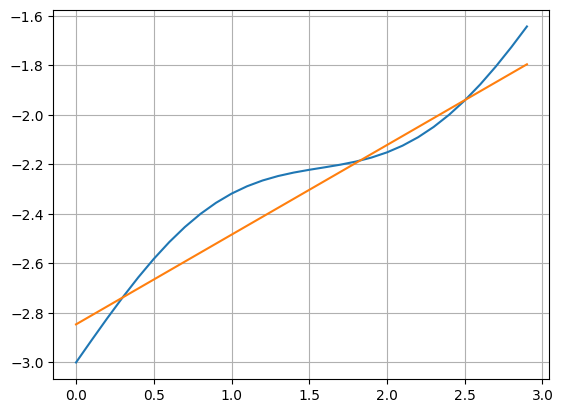

In [7]:
print(w)
predict = model(x_train, w)

plt.plot(x, y_train.numpy())
plt.plot(x, predict.data.numpy())
plt.grid()
plt.show()

tensor([-2.7834,  0.3591], requires_grad=True)


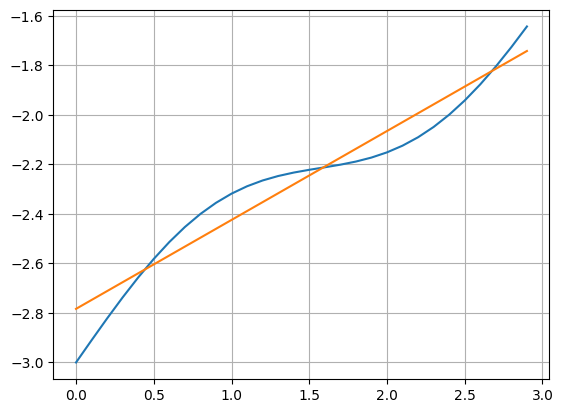

In [8]:
#изменение функции потерь

y_train = 0.5 * x +0.2 * torch.sin(2*x) - 3
x_train = torch.tensor([[_x ** _n for _n in range(N)] for _x in x])

total = len(x) #размер обучающей выборки
lr = torch.tensor([0.1, 0.01])
loss_func = torch.nn.MSELoss() #функция потерь


#стохастический градиентный спуск
for _ in range(1000):
    k = randint(0, total - 1)
    y = model(x_train[k], w)
    loss = loss_func(y, y_train[k])
    
    #шаг градиентного спуска
    loss.backward()
    w.data = w.data - lr * w.grad
    w.grad.zero_()
    
print(w)
predict = model(x_train, w)

plt.plot(x, y_train.numpy())
plt.plot(x, predict.data.numpy())
plt.grid()
plt.show()

In [9]:
#оптимизаторы градиентного спуска

import torch.optim as optim

tensor([-2.8176,  0.3774], requires_grad=True)


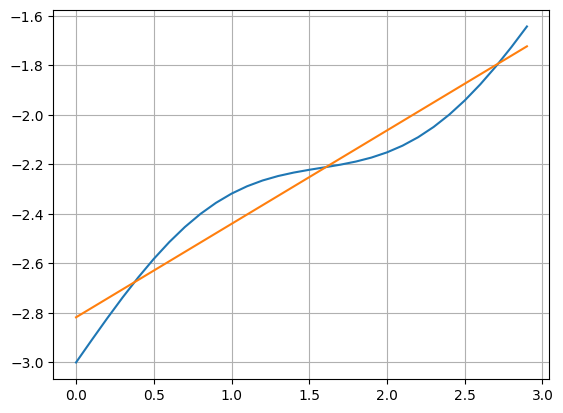

In [10]:
#изменение функции потерь с оптимизатором

y_train = 0.5 * x +0.2 * torch.sin(2*x) - 3
x_train = torch.tensor([[_x ** _n for _n in range(N)] for _x in x])

total = len(x) #размер обучающей выборки
lr = torch.tensor([0.1, 0.01])
loss_func = torch.nn.MSELoss() #функция потерь

#оптимизатор "Импульс Нестерова"
optimizer = optim.SGD(params=[w], lr=0.01, momentum=0.8, nesterov=True)

#стохастический градиентный спуск
for _ in range(1000):
    k = randint(0, total - 1)
    y = model(x_train[k], w)
    loss = loss_func(y, y_train[k])
    
    #шаг градиентного спуска
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    
print(w)
predict = model(x_train, w)

plt.plot(x, y_train.numpy())
plt.plot(x, predict.data.numpy())
plt.grid()
plt.show()

tensor([-2.8191,  0.3494], requires_grad=True)


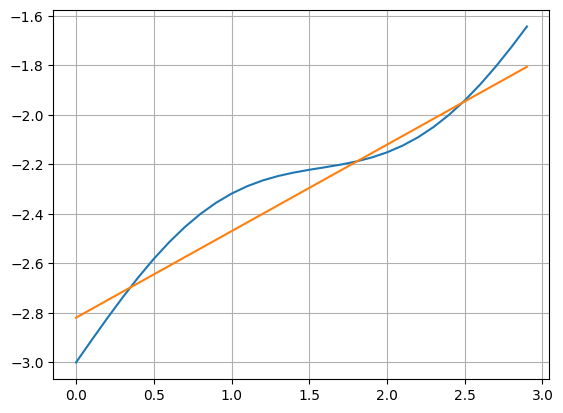

In [12]:
#изменение функции потерь с оптимизатором

y_train = 0.5 * x +0.2 * torch.sin(2*x) - 3
x_train = torch.tensor([[_x ** _n for _n in range(N)] for _x in x])

total = len(x) #размер обучающей выборки
lr = torch.tensor([0.1, 0.01])
loss_func = torch.nn.MSELoss() #функция потерь

#оптимизатор Adam
optimizer = optim.Adam(params=[w], lr=0.01)

#стохастический градиентный спуск
for _ in range(1000):
    k = randint(0, total - 1)
    y = model(x_train[k], w)
    loss = loss_func(y, y_train[k])
    
    #шаг градиентного спуска
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    
print(w)
predict = model(x_train, w)

plt.plot(x, y_train.numpy())
plt.plot(x, predict.data.numpy())
plt.grid()
plt.show()

tensor([-2.8106,  0.3207], requires_grad=True)


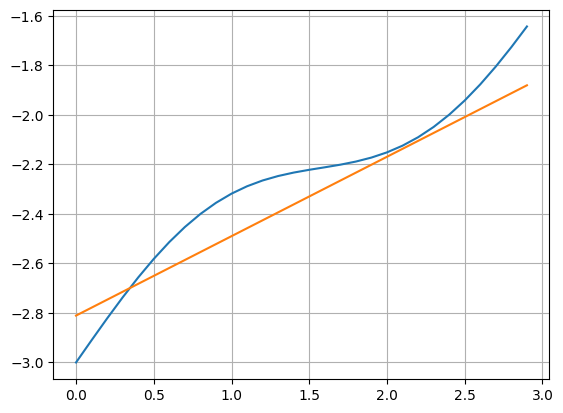

In [13]:
#изменение функции потерь с оптимизатором

y_train = 0.5 * x +0.2 * torch.sin(2*x) - 3
x_train = torch.tensor([[_x ** _n for _n in range(N)] for _x in x])

total = len(x) #размер обучающей выборки
lr = torch.tensor([0.1, 0.01])
loss_func = torch.nn.L1Loss() #функция потерь

#оптимизатор Adam
optimizer = optim.Adam(params=[w], lr=0.01)

#стохастический градиентный спуск
for _ in range(1000):
    k = randint(0, total - 1)
    y = model(x_train[k], w)
    loss = loss_func(y, y_train[k])
    
    #шаг градиентного спуска
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    
print(w)
predict = model(x_train, w)

plt.plot(x, y_train.numpy())
plt.plot(x, predict.data.numpy())
plt.grid()
plt.show()